# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('bmh')

sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv')

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# Aggregate data by year to create a 124-year time series
# Aggregate data by year, computing the mean for each climate variable and sort to maintain chronological order
year_based_data = df.groupby('Year').agg('mean').reset_index().sort_values('Year')
year_based_data

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...,...
119,2019,14.500105,348.642249,151.020415,9.014690
120,2020,14.496937,350.021731,150.219741,9.054254
121,2021,14.501424,350.150302,150.187456,8.968700
122,2022,14.495233,350.493023,148.857646,8.942012


## 2. Univariate Analysis

Analyze each climate variable independently.

#### Comprehensive univariate analysis for Global Average Temperature

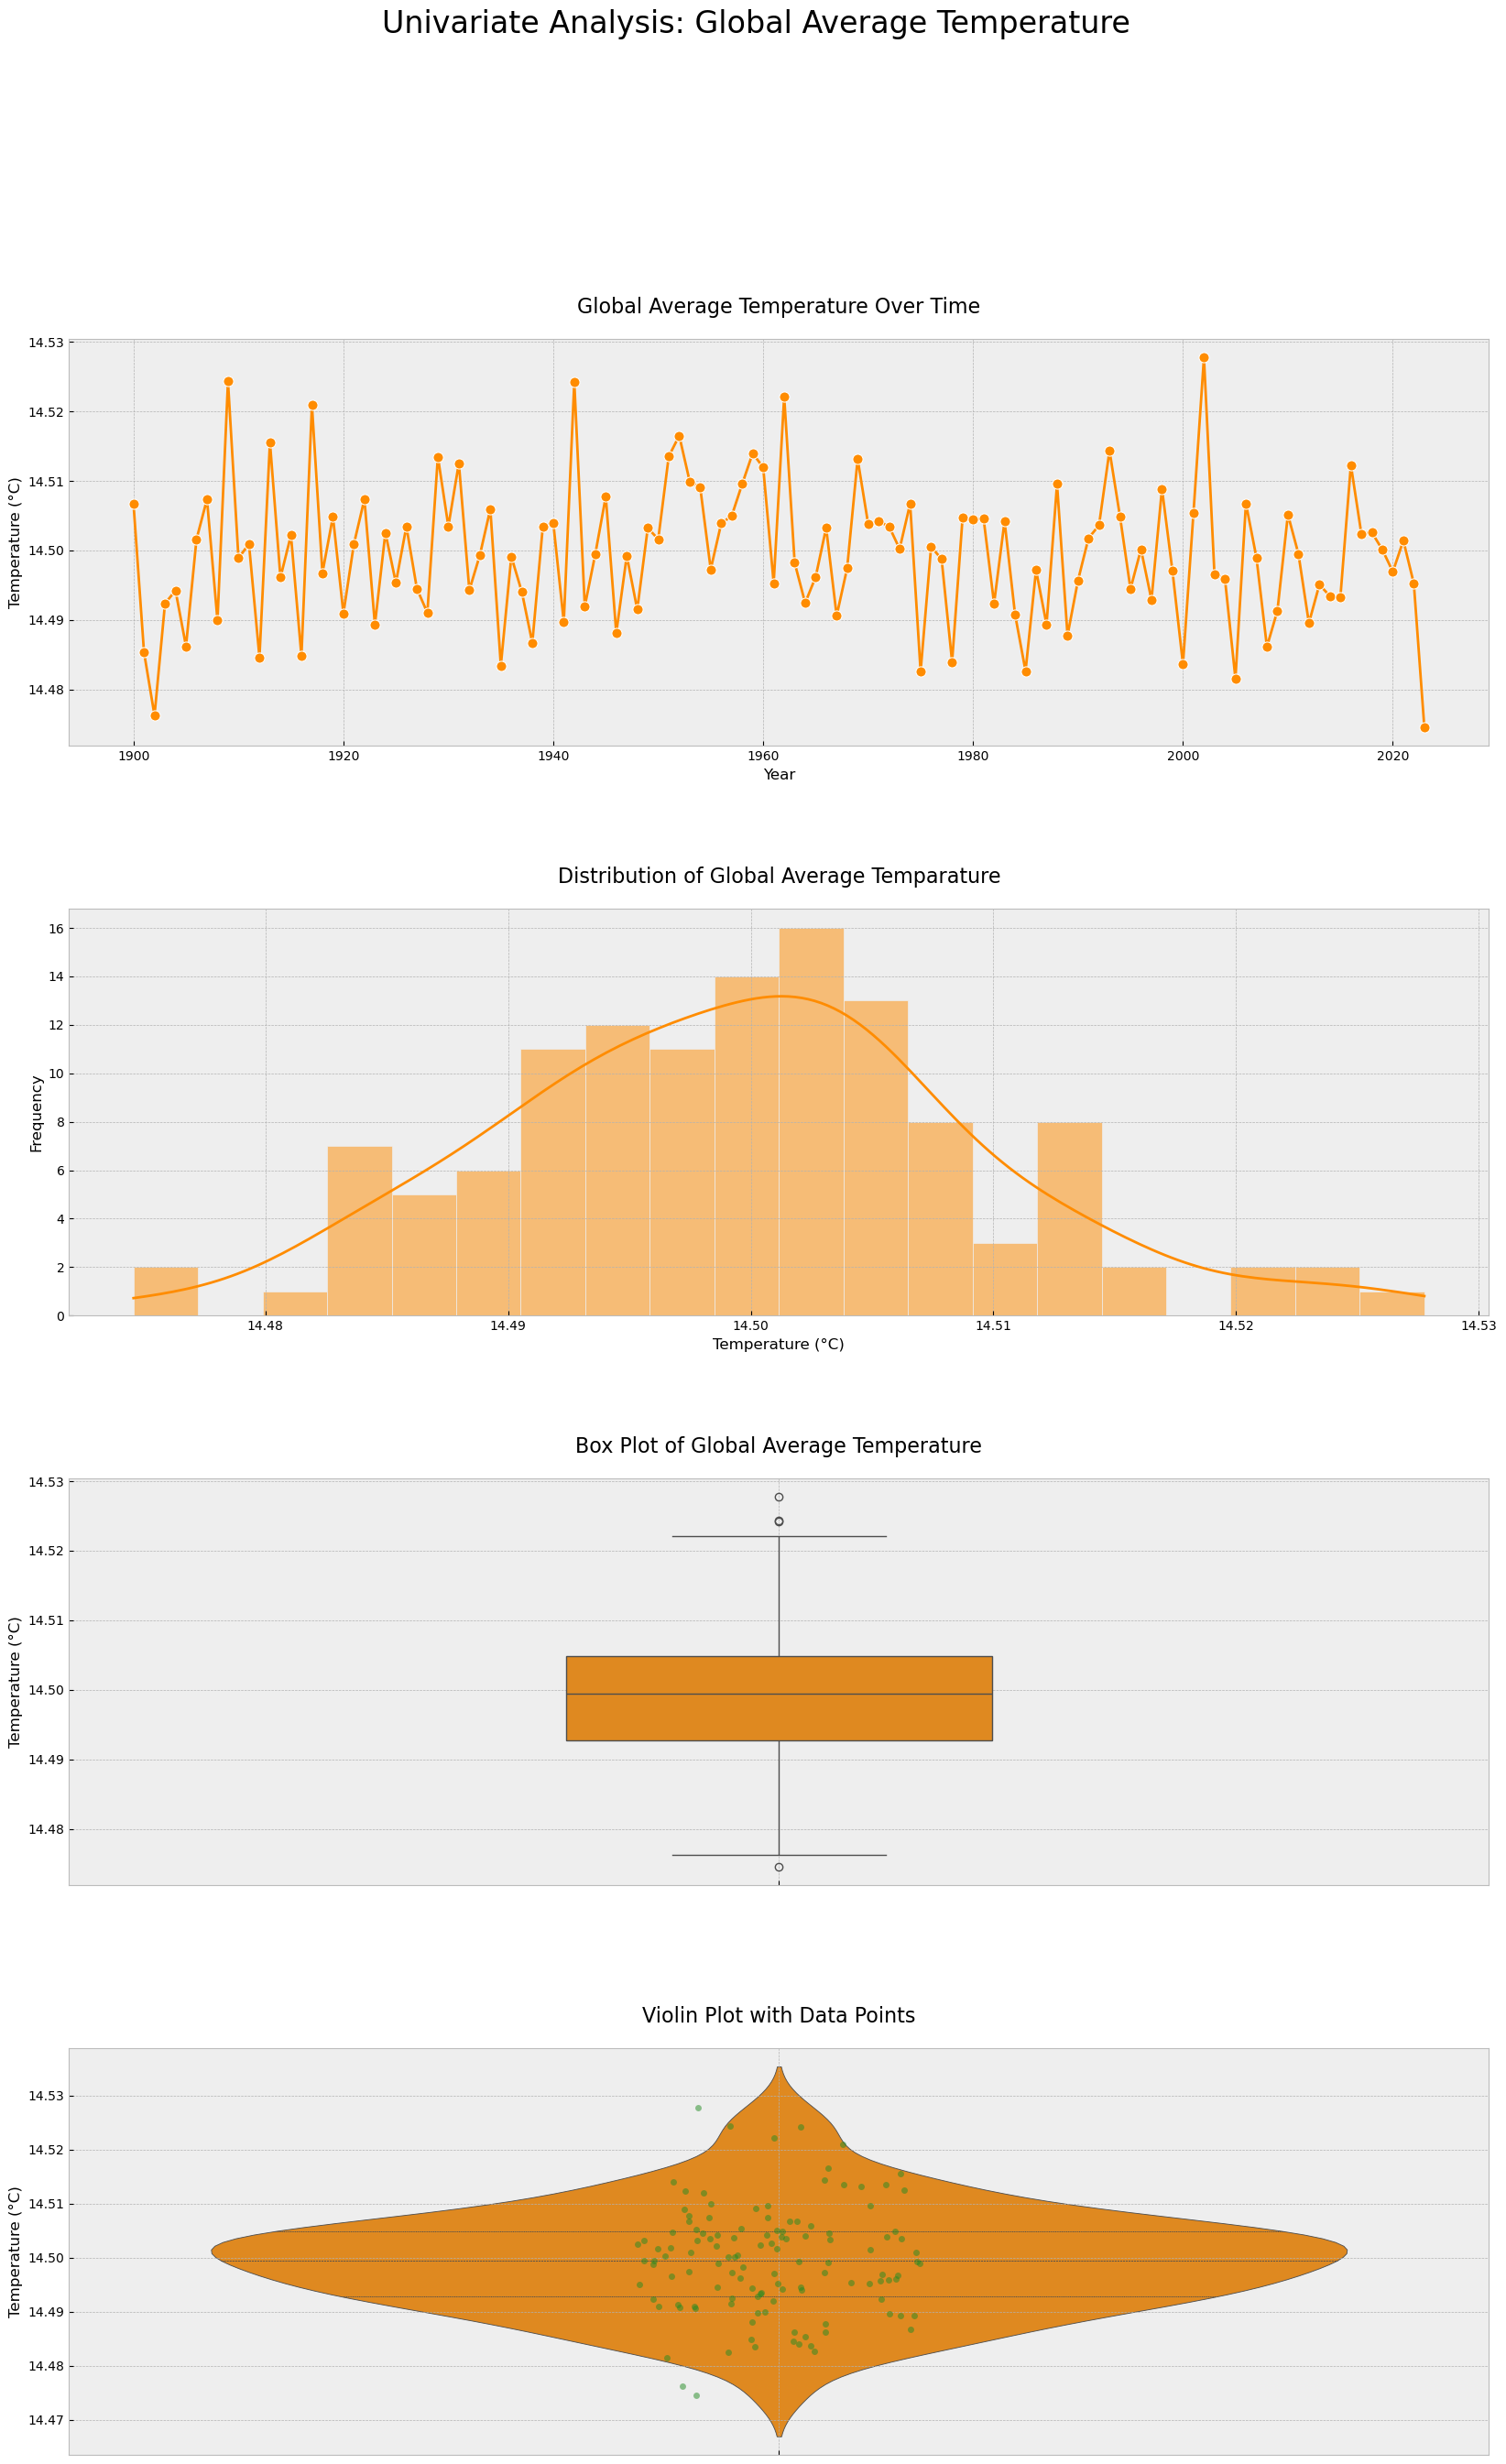

In [5]:
fig = plt.figure(figsize=(20, 30))
fig.suptitle('Univariate Analysis: Global Average Temperature', fontsize=24, y=1)


# Create a grid of subplots - one plot per row
gs = fig.add_gridspec(4, 1, hspace=0.4, wspace=0.3)

# 1. Time Series Plot
ax1 = fig.add_subplot(gs[0])
sns.lineplot(data=year_based_data, x='Year', y='Global Average Temperature (°C)',
            marker='o', linewidth=2, markersize=8, ax=ax1, color="darkorange")
ax1.set_title('Global Average Temperature Over Time', fontsize=16, pad=20)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.grid(True)

# 2. Histogram with KDE
ax2 = fig.add_subplot(gs[1])
sns.histplot(data=year_based_data, x='Global Average Temperature (°C)', 
            kde=True, bins=20, color="darkorange", ax=ax2)
ax2.set_title('Distribution of Global Average Temparature', fontsize=16, pad=20)
ax2.set_xlabel('Temperature (°C)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.grid(True)

# 3. Box Plot
ax3 = fig.add_subplot(gs[2])
sns.boxplot(data=year_based_data, y='Global Average Temperature (°C)', 
           width=0.3, color="darkorange", ax=ax3)
ax3.set_title('Box Plot of Global Average Temperature', fontsize=16, pad=20)
ax3.set_ylabel('Temperature (°C)', fontsize=12)
ax3.grid(True)

# 4. Violin Plot with Strip Plot overlay
ax4 = fig.add_subplot(gs[3])
sns.violinplot(data=year_based_data, y='Global Average Temperature (°C)', 
              inner="quartile", ax=ax4, color="darkorange")
sns.stripplot(data=year_based_data, y='Global Average Temperature (°C)', 
             color='forestgreen', alpha=0.50, ax=ax4)
ax4.set_title('Violin Plot with Data Points', fontsize=16, pad=20)
ax4.set_ylabel('Temperature (°C)', fontsize=12)
ax4.grid(True)

plt.show()

#### Comprehensive univariate analysis for CO2 Concentration

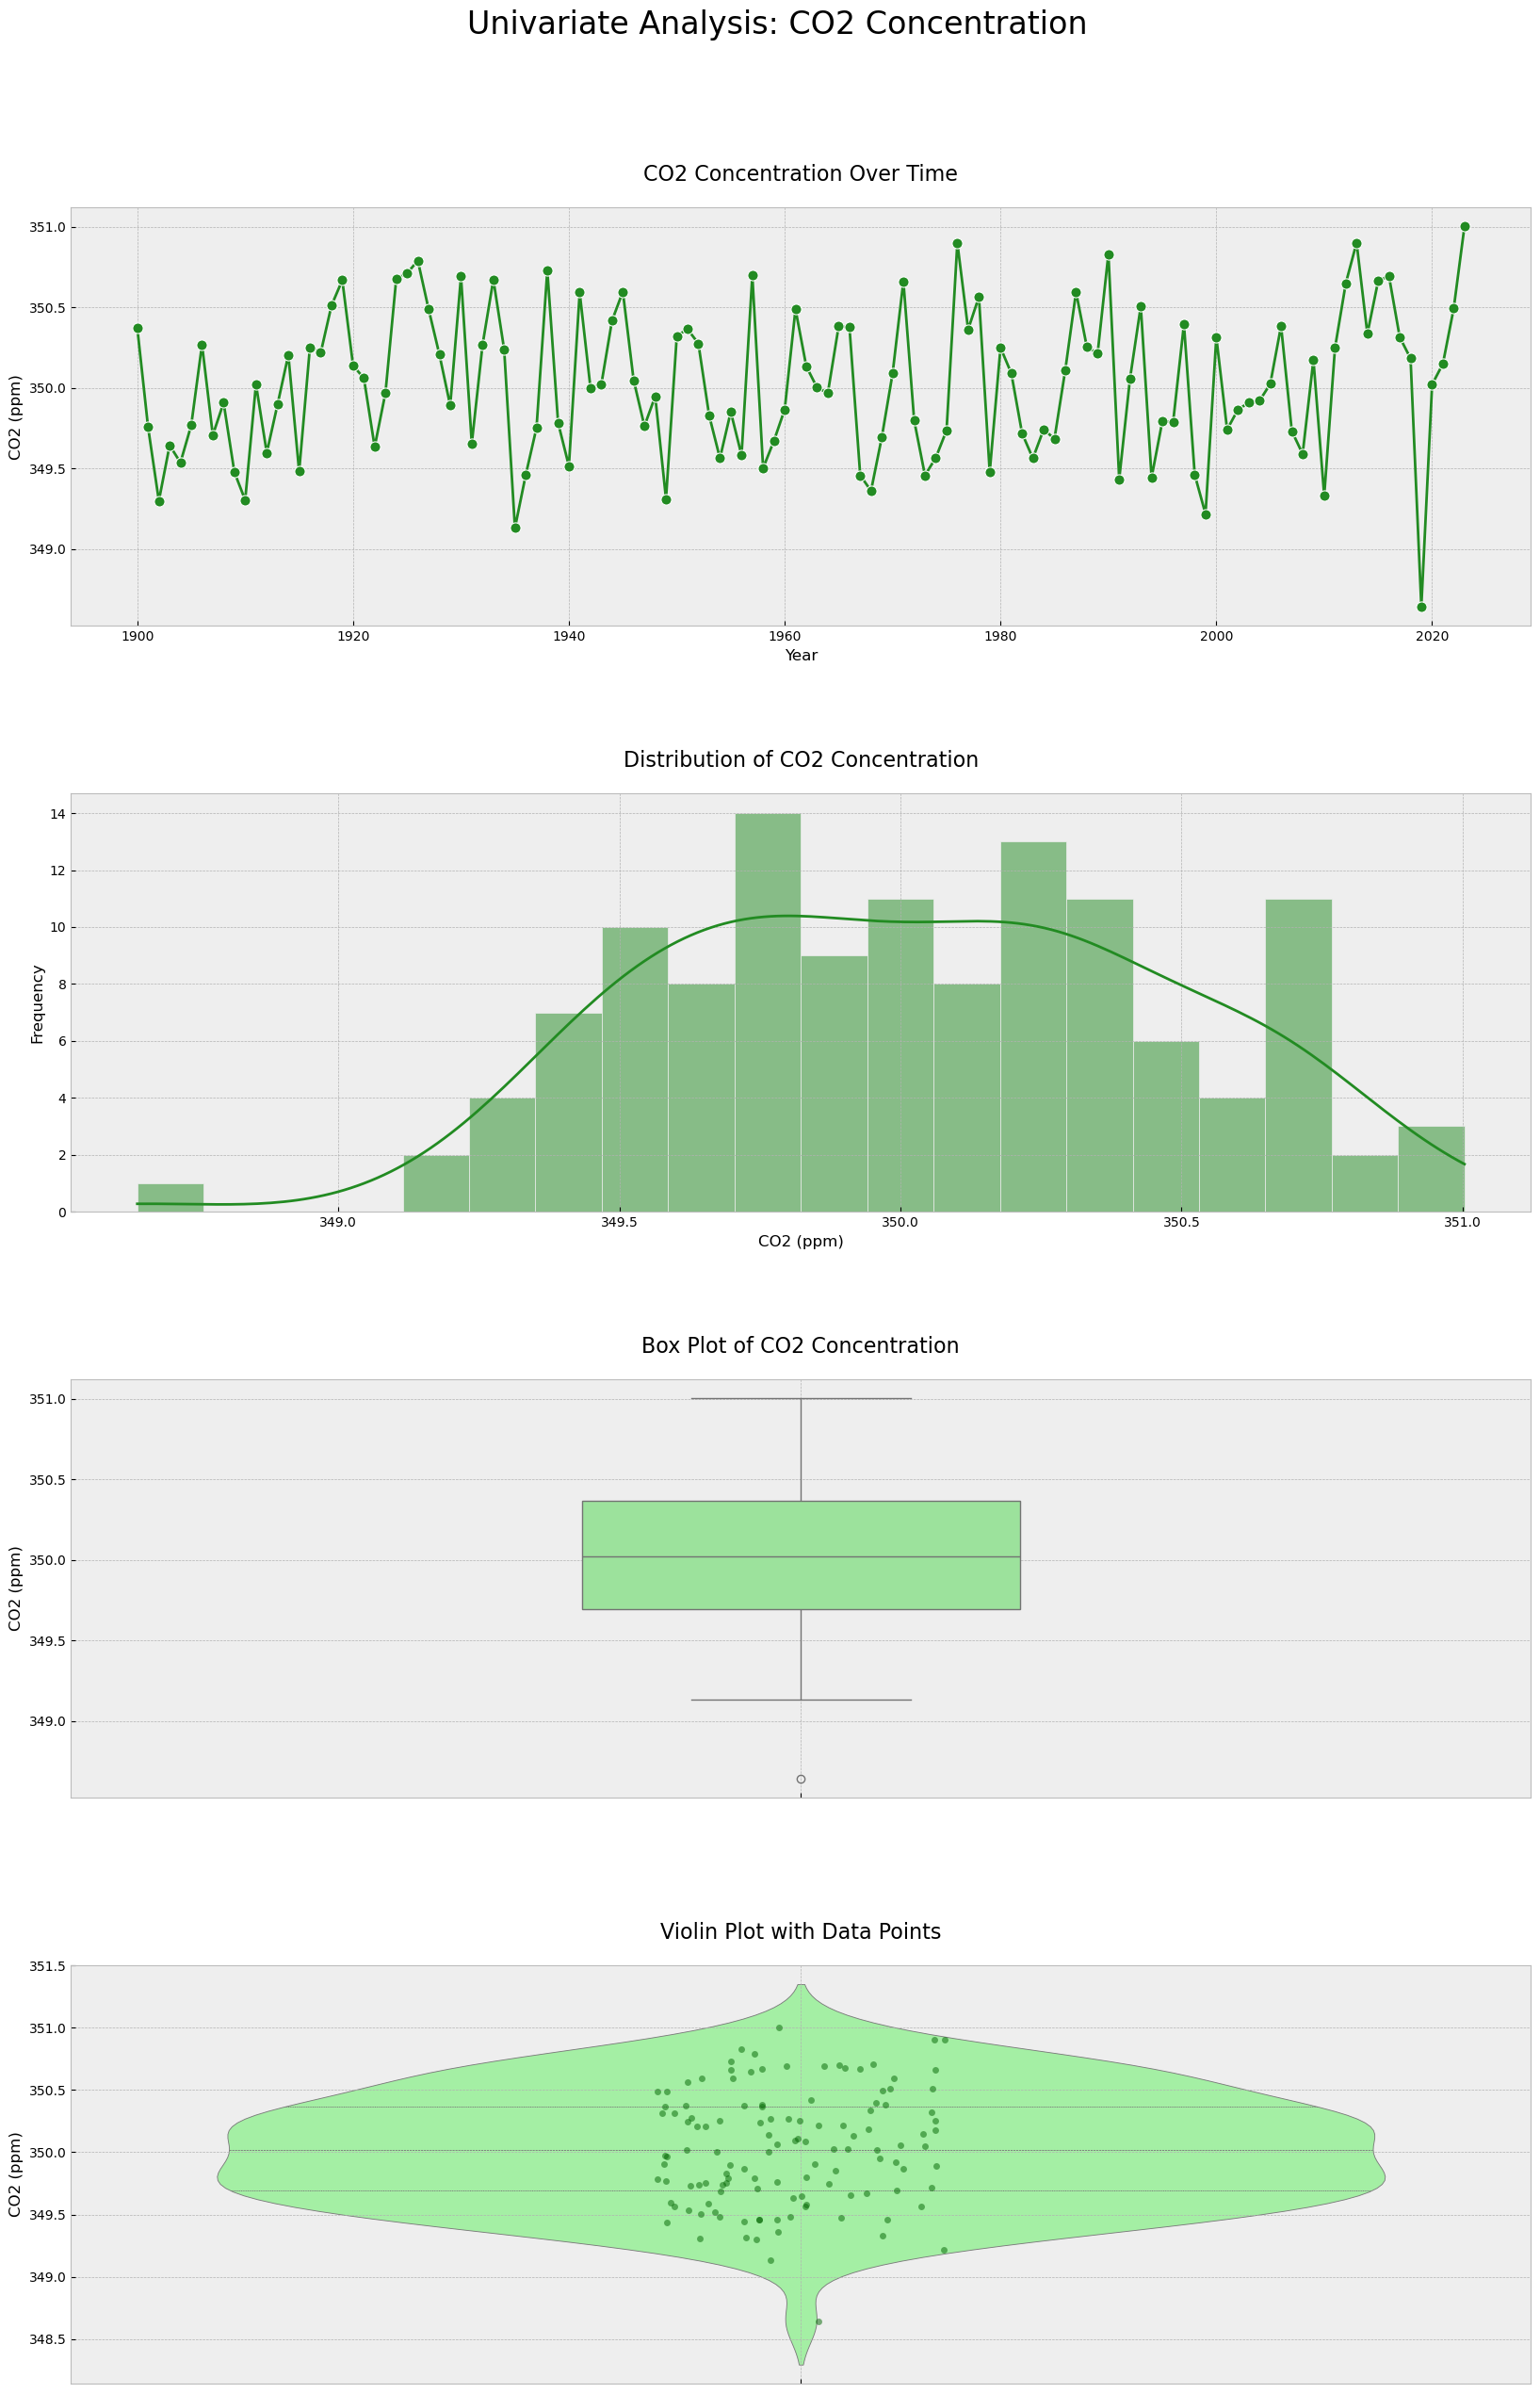

In [6]:
fig = plt.figure(figsize=(20, 30))
fig.suptitle('Univariate Analysis: CO2 Concentration', fontsize=24, y=0.95)

# Create a grid of subplots - one plot per row
gs = fig.add_gridspec(4, 1, hspace=0.4, wspace=0.3)  # 4 rows, 1 column

# 1. Time Series Plot
ax1 = fig.add_subplot(gs[0])
sns.lineplot(data=year_based_data, x='Year', y='CO2 Concentration (ppm)',
            marker='o', linewidth=2, markersize=8, ax=ax1, color="forestgreen")
ax1.set_title('CO2 Concentration Over Time', fontsize=16, pad=20)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('CO2 (ppm)', fontsize=12)
ax1.grid(True)

# 2. Histogram with KDE
ax2 = fig.add_subplot(gs[1])
sns.histplot(data=year_based_data, x='CO2 Concentration (ppm)', 
            kde=True, bins=20, color="forestgreen", ax=ax2)
ax2.set_title('Distribution of CO2 Concentration', fontsize=16, pad=20)
ax2.set_xlabel('CO2 (ppm)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.grid(True)

# 3. Box Plot
ax3 = fig.add_subplot(gs[2])
sns.boxplot(data=year_based_data, y='CO2 Concentration (ppm)', 
           width=0.3, color="lightgreen", ax=ax3)
ax3.set_title('Box Plot of CO2 Concentration', fontsize=16, pad=20)
ax3.set_ylabel('CO2 (ppm)', fontsize=12)
ax3.grid(True)

# 4. Violin Plot with Strip Plot overlay
ax4 = fig.add_subplot(gs[3])
sns.violinplot(data=year_based_data, y='CO2 Concentration (ppm)', 
              inner="quartile", ax=ax4, color="palegreen")
sns.stripplot(data=year_based_data, y='CO2 Concentration (ppm)', 
             color='darkgreen', alpha=0.5, ax=ax4)
ax4.set_title('Violin Plot with Data Points', fontsize=16, pad=20)
ax4.set_ylabel('CO2 (ppm)', fontsize=12)
ax4.grid(True)

plt.show()

#### Comprehensive univariate analysis for Sea Level Rise

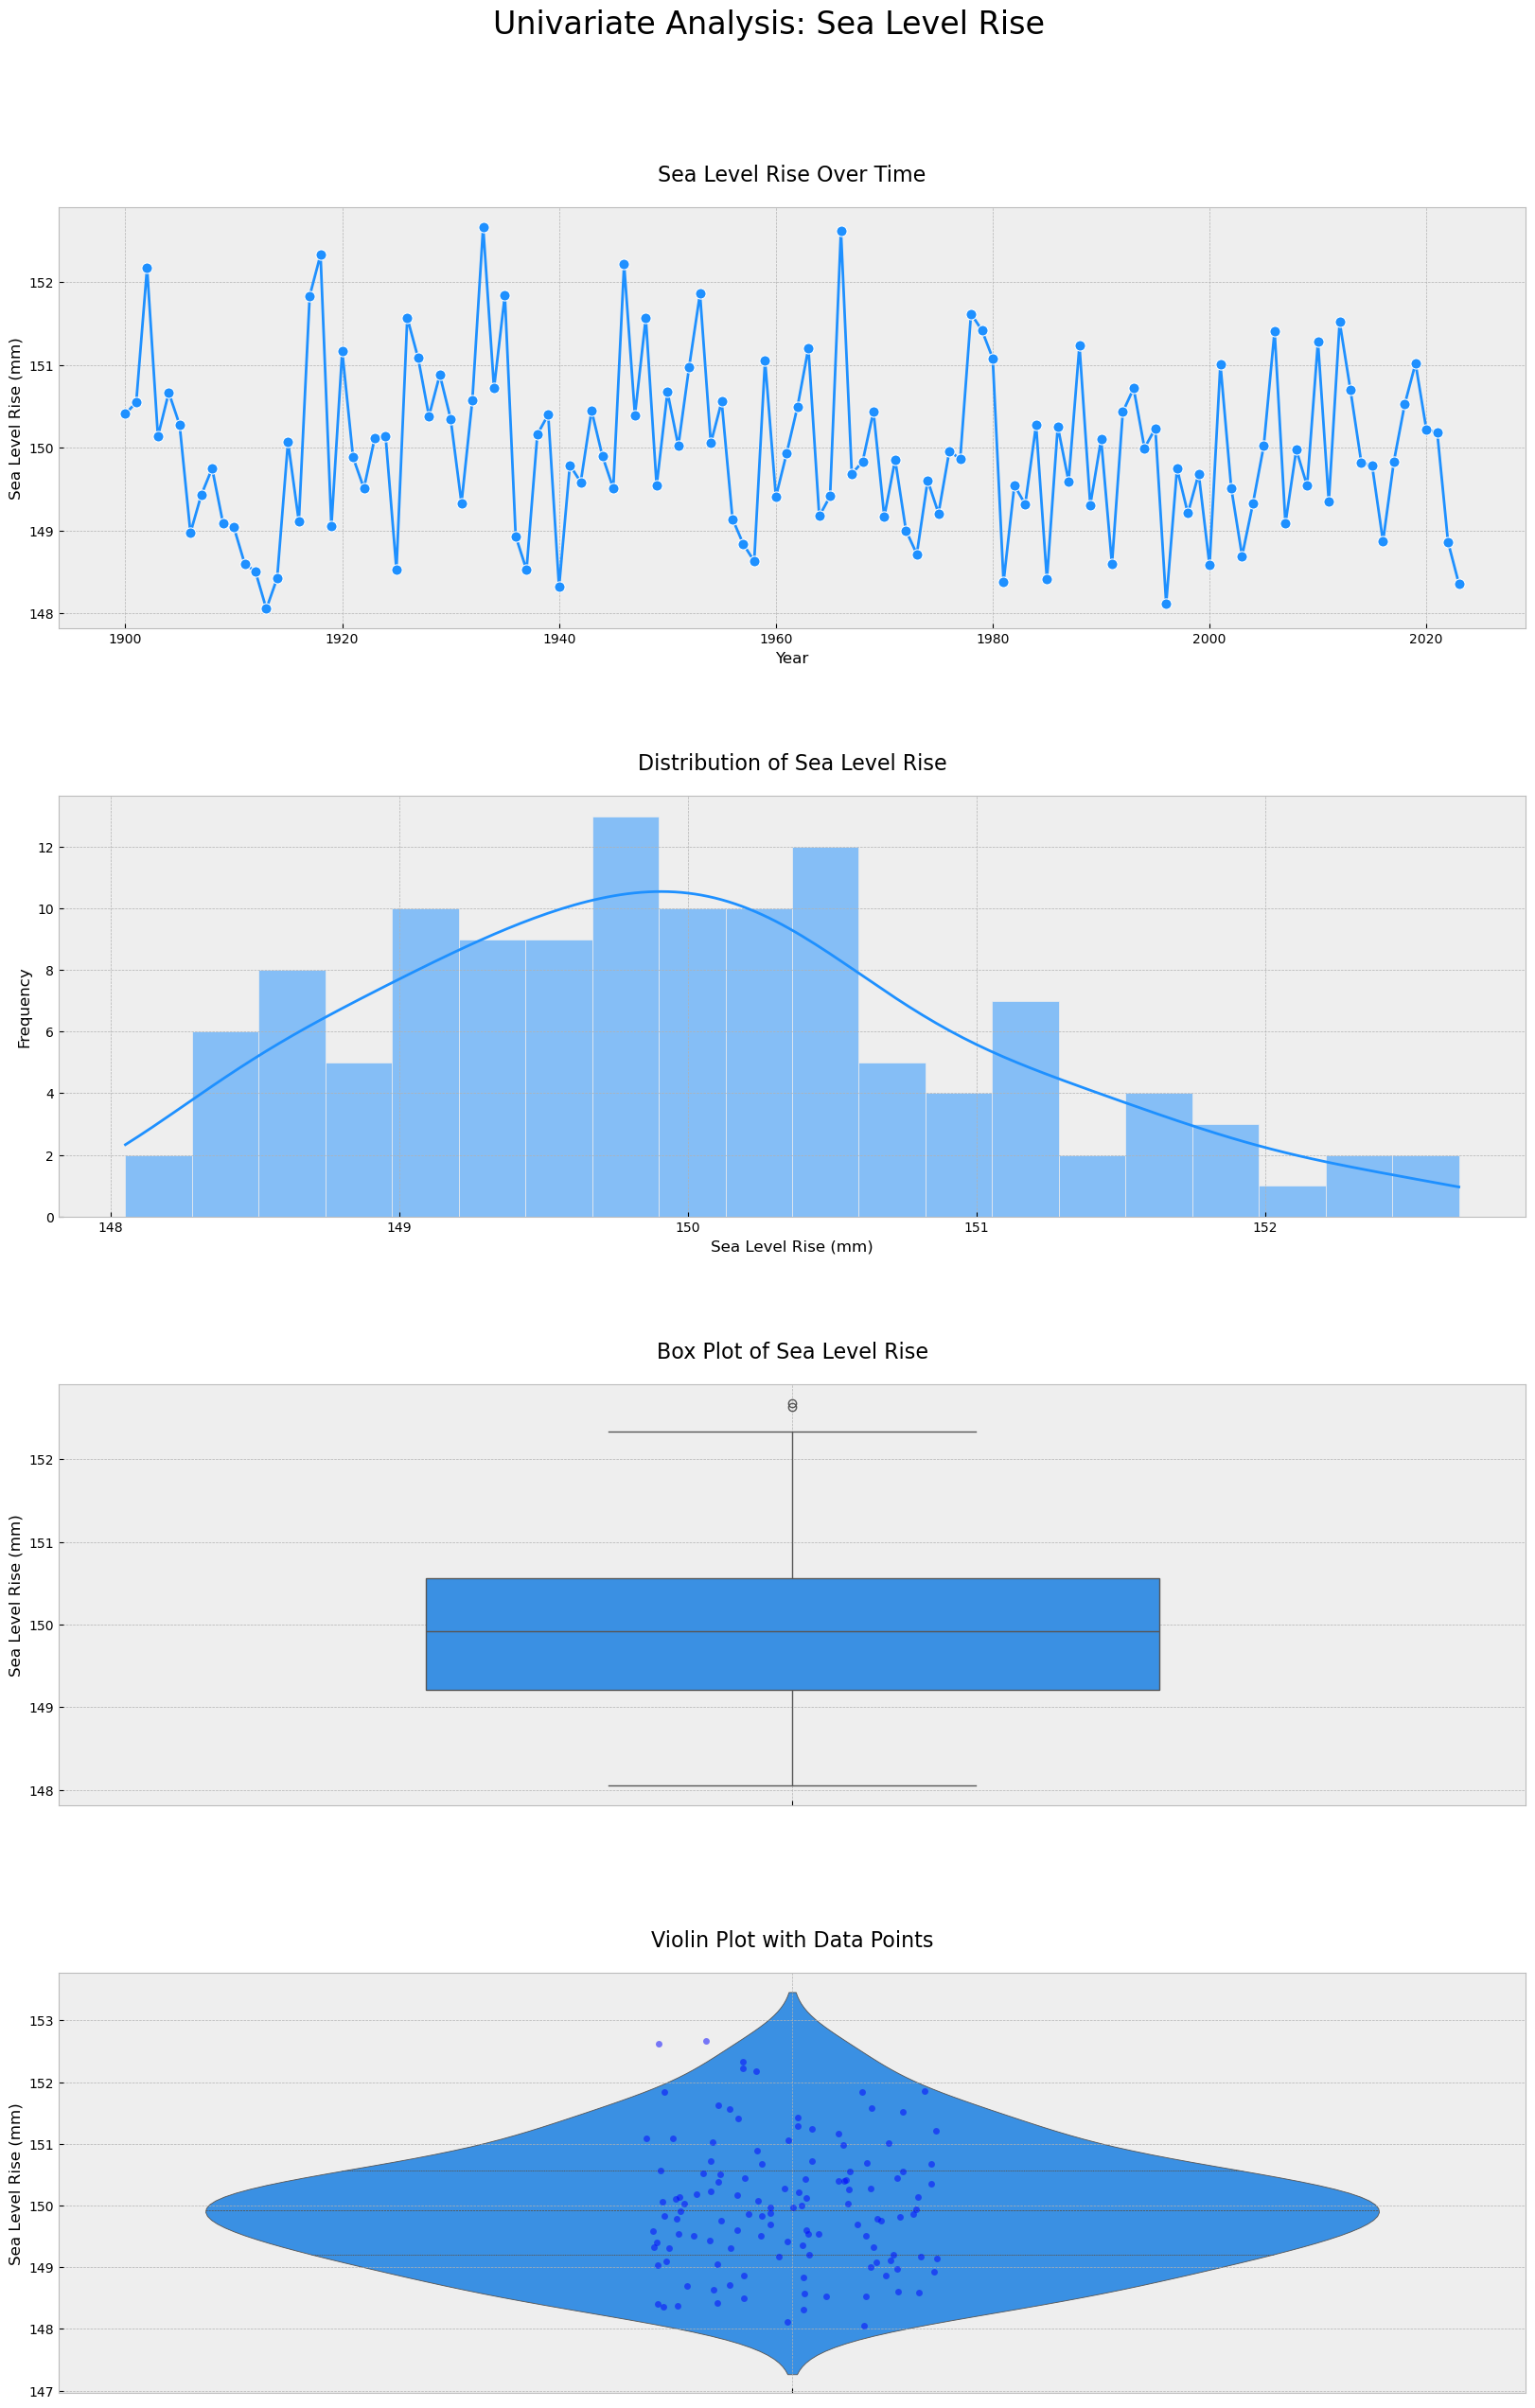

In [7]:
fig = plt.figure(figsize=(20, 30))
fig.suptitle('Univariate Analysis: Sea Level Rise', fontsize=24, y=0.95)

# Create a grid of subplots
gs = fig.add_gridspec(4, 1, hspace=0.4, wspace=0.3)  # 4 rows, 1 column

# 1. Time Series Plot
ax1 = fig.add_subplot(gs[0])  # Span both columns
sns.lineplot(data=year_based_data, x='Year', y='Sea Level Rise (mm)',
            marker='o', linewidth=2, markersize=8, ax=ax1, color="dodgerblue")
ax1.set_title('Sea Level Rise Over Time', fontsize=16, pad=20)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Sea Level Rise (mm)', fontsize=12)
ax1.grid(True)

# 2. Histogram with KDE
ax2 = fig.add_subplot(gs[1])
sns.histplot(data=year_based_data, x='Sea Level Rise (mm)', 
            kde=True, bins=20, color="dodgerblue", ax=ax2)
ax2.set_title('Distribution of Sea Level Rise', fontsize=16, pad=20)
ax2.set_xlabel('Sea Level Rise (mm)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.grid(True)

# 3. Box Plot
ax3 = fig.add_subplot(gs[2])
sns.boxplot(data=year_based_data, y='Sea Level Rise (mm)', 
           width=0.5, color="dodgerblue", ax=ax3)
ax3.set_title('Box Plot of Sea Level Rise', fontsize=16, pad=20)
ax3.set_ylabel('Sea Level Rise (mm)', fontsize=12)
ax3.grid(True)

# 4. Violin Plot with Strip Plot overlay
ax4 = fig.add_subplot(gs[3])
sns.violinplot(data=year_based_data, y='Sea Level Rise (mm)', 
              inner="quartile", ax=ax4, color="dodgerblue")
sns.stripplot(data=year_based_data, y='Sea Level Rise (mm)', 
             color='blue', alpha=0.5, ax=ax4)
ax4.set_title('Violin Plot with Data Points', fontsize=16, pad=20)
ax4.set_ylabel('Sea Level Rise (mm)', fontsize=12)
ax4.grid(True)

# Show the plots
plt.show()

#### Comprehensive univariate analysis for Arctic Ice Area

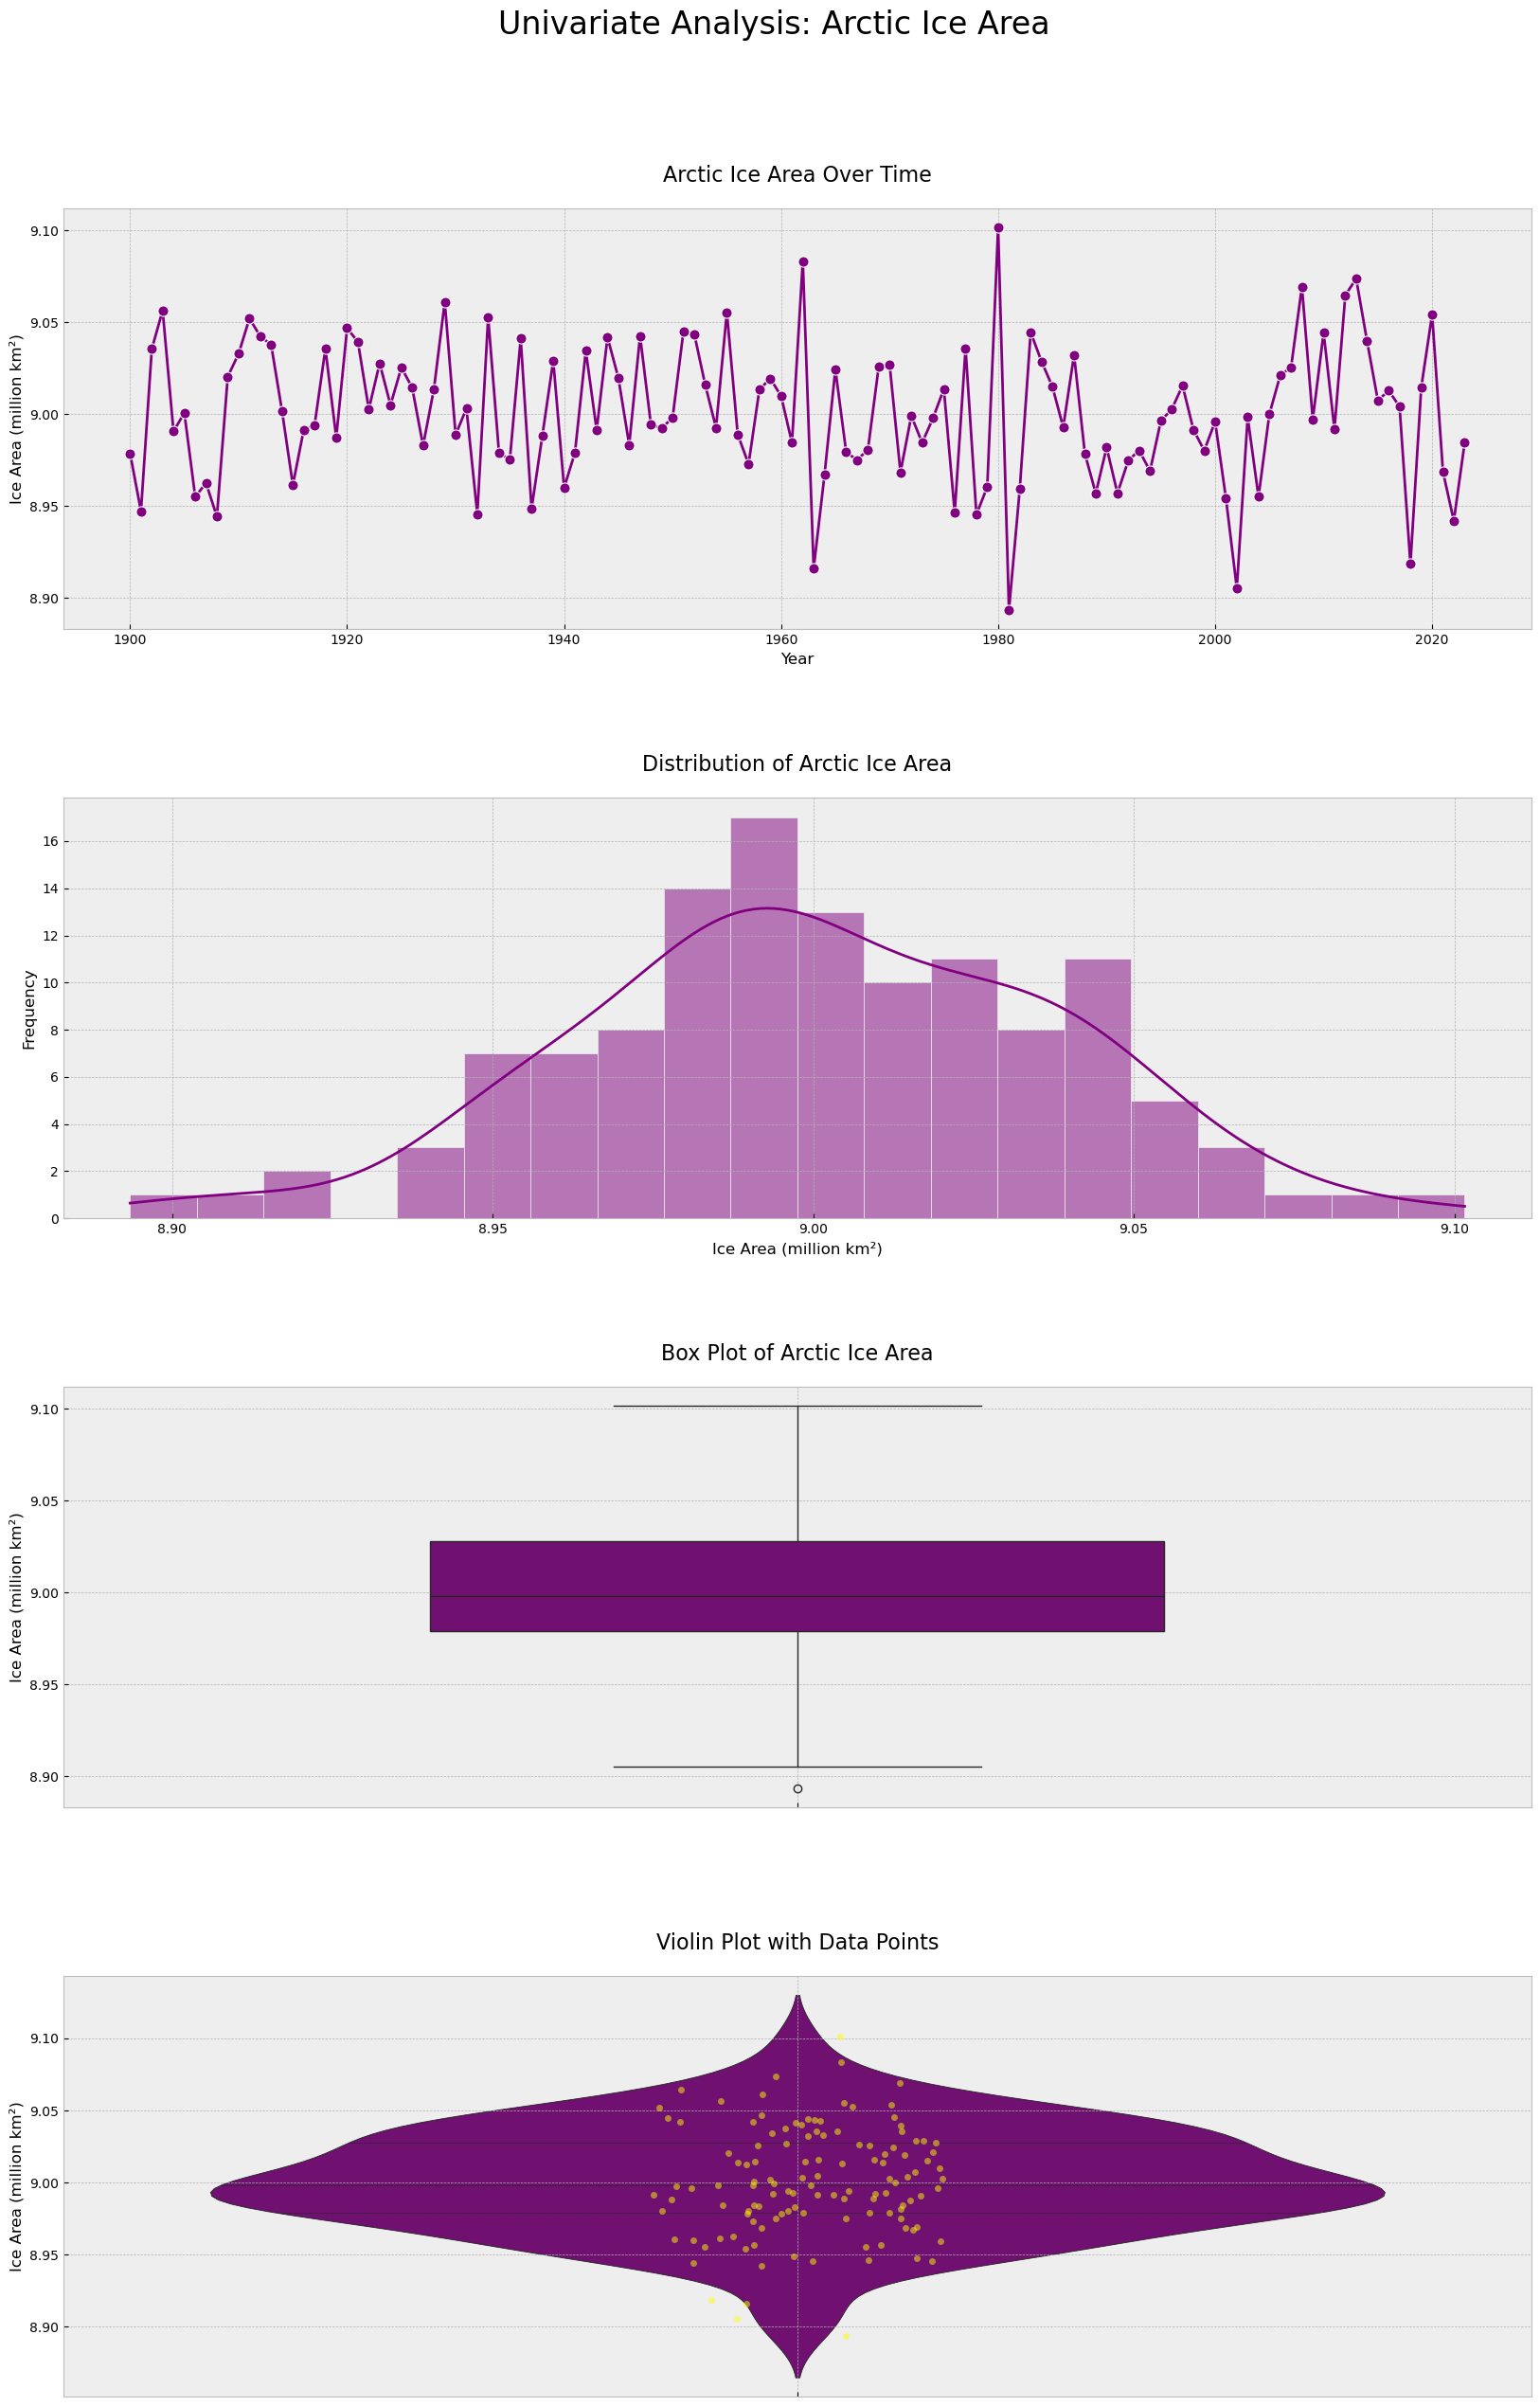

In [11]:
fig = plt.figure(figsize=(20, 30))
fig.suptitle('Univariate Analysis: Arctic Ice Area', fontsize=24, y=0.95)

# Create a grid of subplots
gs = fig.add_gridspec(4, 1, hspace=0.4, wspace=0.3)  # 4 rows, 1 column

# 1. Time Series Plot
ax1 = fig.add_subplot(gs[0])  # Span both columns
sns.lineplot(data=year_based_data, x='Year', y='Arctic Ice Area (million km²)',
            marker='o', linewidth=2, markersize=8, ax=ax1, color="purple")
ax1.set_title('Arctic Ice Area Over Time', fontsize=16, pad=20)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Ice Area (million km²)', fontsize=12)
ax1.grid(True)

# 2. Histogram with KDE
ax2 = fig.add_subplot(gs[1])
sns.histplot(data=year_based_data, x='Arctic Ice Area (million km²)', 
            kde=True, bins=20, color="purple", ax=ax2)
ax2.set_title('Distribution of Arctic Ice Area', fontsize=16, pad=20)
ax2.set_xlabel('Ice Area (million km²)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.grid(True)

# 3. Box Plot
ax3 = fig.add_subplot(gs[2])
sns.boxplot(data=year_based_data, y='Arctic Ice Area (million km²)', 
           width=0.5, color="purple", ax=ax3)
ax3.set_title('Box Plot of Arctic Ice Area', fontsize=16, pad=20)
ax3.set_ylabel('Ice Area (million km²)', fontsize=12)
ax3.grid(True)

# 4. Violin Plot with Strip Plot overlay
ax4 = fig.add_subplot(gs[3])
sns.violinplot(data=year_based_data, y='Arctic Ice Area (million km²)', 
              inner="quartile", ax=ax4, color="purple")
sns.stripplot(data=year_based_data, y='Arctic Ice Area (million km²)', 
             color='yellow', alpha=0.5, ax=ax4)
ax4.set_title('Violin Plot with Data Points', fontsize=16, pad=20)
ax4.set_ylabel('Ice Area (million km²)', fontsize=12)
ax4.grid(True)

# Show the plots
plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [9]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [10]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here